In [33]:
import PIL
from PIL import Image
import imagehash

import pycamhd.pycamhd as camhd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xar
import urllib as url

movLink = "https://rawdata.oceanobservatories.org/files/RS03ASHS/PN03B/06-CAMHDA301/2016/07/29/CAMHDA301-20160729T000000Z.mov"
movAtom = camhd.get_moov_atom(movLink)
frameTotal = camhd.get_frame_count(movLink, movAtom) 
frames = range(0,frameTotal,200)
#print(frameTotal)                        

def diff_letters(a,b):
    if (len(a) != len(b)):
        return -1
    else:
        return sum ( a[i] != b[i] for i in range(len(a)) )

In [34]:
avgFrameHashes = []
avgFrameIntHashes = []

for i in frames:
    
    frame = camhd.get_frame(movLink, i)
    im = Image.fromarray(frame)
    hash = imagehash.average_hash(im)
    print(hash)
    avgFrameHashes.append(hash)
    intHash = hash.__hash__()
    print(intHash)
    avgFrameIntHashes.append(intHash)

0000000000000000
0
0000000000000000
0
0000000000000000
0
000e0e1e7e7efe4f
965
010f0f0f2ff7ffdb
1805
000ccecece4e0e0e
731
000ccececece0e0e
732
000ccececece0e0e
732
003c3f3f1f3f2f27
1536
000000070707070f
1136
0000000101010103
704
0000303f3d3d3f1f
1140
0000093f7f7f3f1d
1340
00000f1f3d3d3f3d
1304
000007377d7d3b31
1200
000000070707070f
1136
00606c6c7e7ece0e
593
040ccecece4e0e0e
763
000ccececece0e0e
732
003c3c7e7e7e7e4e
738
0000183e3e7e7e7e
650
0000183e3e7e7e7e
650
f1d09c8ca5172b45
1031
7edbdc6e6563590e
1152
7f9bd84e616b696b
1324
7edbda4f6569792b
1364
3adbda4c6161682f
986
0000183e3e7e7e7e
650
4048cc6cfece4e0e
593
000ccececece0e0e
732
000ccececece0e0e
732
243c7c7cfefefc4c
587
0000183c3e7c7efe
523
0000383c7cfcfcfe
403
0009020f0f1f1f0f
1424
2006333737333736
1324
2406133336333536
1128
2406333236330736
1056
2006163237372736
1088
0000307c7cfcfcfc
325
40684c6c7ece4e0e
595
040ccececece0e0e
764
000ccececece0e0e
732
3878f8f8f8f8f8f8
244
3878f8f8fcf8f878
275
3c3c3e7e7e6eeefa
828
58cf47d33ebf8b8c
1333
9

In [35]:
pFrameHashes = []
pFrameIntHashes = []

for i in frames:
    
    frame = camhd.get_frame(movLink, i)
    im = Image.fromarray(frame)
    hash = imagehash.phash(im)
    print(hash)
    pFrameHashes.append(hash)
    intHash = hash.__hash__()
    print(intHash)
    pFrameIntHashes.append(intHash)

0000000000000000
0
0000000000000000
0
0000000000000000
0
951b25ca2df40ab7
1176
b93b68421f6867d1
1104
906a4421aaf96dbf
940
904a4523ba7ded9a
1004
906a4523ba7d6d9c
975
875e6b3a31c51e4c
1126
b6495bb4b1695a54
941
aa5525aa2d55adaa
1120
aa55287a2a55aade
831
aa552a7a2a55aa75
946
aa552a4e2a55aa5f
1042
aa550a6a2a55aa7f
1014
b6495bb4a9695a94
948
d0492d1e16fb05e7
1175
906a44612af96dbf
941
904a4523ba7d6d9e
1035
d00e3eed2c78437a
800
946f69139ecc5835
1007
946f691296ccd8b5
865
fefce001e1859e49
888
81dc9c2736d823fa
899
81dccc233290e7fe
878
81dc8c0336dc67fc
889
81dc8c2736d067fc
877
946f693396cc5835
995
d04825bd45b26ddd
990
906a44212afd6dbf
971
904a4523ba7d6db6
1023
d00e1ee5257d61ea
985
d22f699297cc5c31
1024
d22f7c1093cf4c96
988
a96b494b4a6cd674
1008
8660596bd16b6d36
1114
8640d36f416b6d3e
1198
8640d32b536b6d3e
1236
a6705b2f496b6d30
1131
d32534bb90c5cf92
1120
d0492daf06327f9c
1065
914a44233a7d6dbe
1038
904a4522ba7d6dbe
911
c9310cb733642f7c
1120
c9210dfe32646e7c
876
d55e5e028eb52f81
1138
9ee07f8f4868439a
9

In [36]:
dFrameHashes = []
dFrameIntHashes = []

for i in frames:
    
    frame = camhd.get_frame(movLink, i)
    im = Image.fromarray(frame)
    hash = imagehash.dhash(im)
    print(hash)
    dFrameHashes.append(hash)
    intHash = hash.__hash__()
    print(intHash)
    dFrameIntHashes.append(intHash)

0000000000000000
0
0000000000000000
0
0000000000000000
0
9a989c3cecc49496
467
9b9f7b7b4ace9533
1480
9898189c9c989cbc
331
9898981c9c9c9cbc
363
9898981c9c9c9cbc
363
6860666eee6fcecf
971
c8c0cbf6f4ececec
556
a0a0f2f1f3f1f1f3
932
c0c4e2e6e5e1e5e5
848
b0f2e9cad9e5d3f5
1026
e8d8ead2f1f1d3e1
836
faeeeee6e5c1c3e5
1096
d0f0f1efe4ececee
684
a8c0c8989c9c9c9c
296
9898189c9c9a9cbc
395
9898981c9c9c9cbc
363
64ecec88c8d8989c
293
e0c4f06cecfcc888
265
e0d0f06cecfcc88a
305
852521696967538d
1366
aa329a88cbcbd3da
983
aa2aba8acbdbd35a
1066
aab2ba8a89cbd35a
985
aab29a888bdbd15a
925
e0c4f06cecfcc888
265
90989898981c9c9c
279
9898189c9c989cbc
331
9898181c9c989cbc
330
cceca8889098b8b8
236
c0c8f060cce898a8
163
c088e0c9f9f9d094
544
331a8eab6bfefedf
1337
5d9466e464676de4
857
4cace6e666666dec
750
4d9c66e464666de4
737
cdace6e664666dec
815
c080c0d8f959d8d4
417
8898989c9c1c9c9c
351
9898189c9c9a9cbc
395
989c981c9c9c9cbc
395
d2f2b2b02860a0b2
352
d2d2b2b02820a0b0
282
e4f84ce8d4da9a56
472
b23c9597f45a757c
912
322cd5b5f1583

In [37]:
wFrameHashes = []
wFrameIntHashes = []

for i in frames:
    
    frame = camhd.get_frame(movLink, i)
    im = Image.fromarray(frame)
    hash = imagehash.whash(im)
    print(hash)
    wFrameHashes.append(hash)
    intHash = hash.__hash__()
    print(intHash)
    wFrameIntHashes.append(intHash)

0000000000000000
0
0000000000000000
0
0000000000000000
0
000a0e1e7c7efe4f
869
0107030f2ff6f99b
1515
044cdececece0e1e
782
084cdececfce0e0e
886
084cdececfce0e0e
886
00383e3f1f3f2707
1356
00003b7f3f3f0f0f
1458
0000183f7f3f3f1f
1282
0000303f3f3f3f3f
1272
0000083f7f7f3f1f
1276
00000f1f3f3f3f3b
1464
0000073f7f7f3b33
1408
00001d3f7f3f1f0f
1430
00607c7c7e7ece0e
609
040cdecedece0e1e
788
084cdecedece0e0e
766
00241c7e7e7e6e4e
702
00003c3e3e7e7e7e
686
00003c3e3e7e7e7e
686
f1d09c8ea12f2b47
1139
5efadc4e6961490a
900
5b1ada4f4969692a
1169
1a5bda4f4969690b
1293
5a5bda4e4169692b
1155
00003c3e3e7e7e7e
686
4048ec6cfecece0e
598
084cdececece0e1e
766
084cfececece0e0e
762
000c7c7c7efe7c0c
535
0000383c3e7efefe
592
0000383c7cfcfefe
467
0008e61f1f3f1f1f
1363
2017333737333736
1460
2407373337b33536
1421
2417373336b31736
1361
201716333737373e
1376
0000787c7cfcfcfc
343
40686c7c7ede4e0e
615
044cdecedece0e0e
782
084cdecedece0e0e
766
0878f8f8f8f87838
228
087878f8f8f8f838
228
302c26447e6e6efa
655
588745533f9f898c
1310


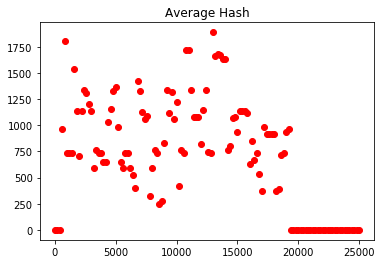

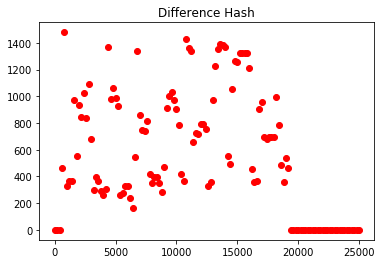

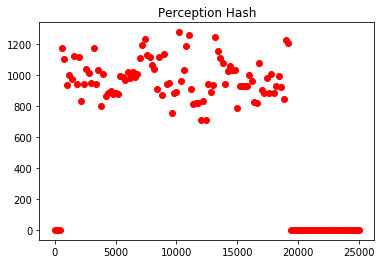

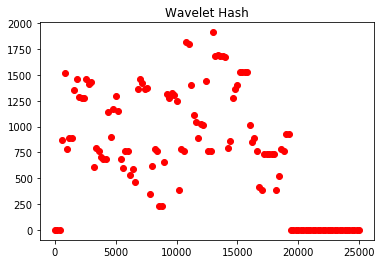

In [38]:
plt.plot(frames,avgFrameIntHashes,"ro")
plt.title("Average Hash")
plt.show()

plt.plot(frames,dFrameIntHashes,"ro")
plt.title("Difference Hash")
plt.show()

plt.plot(frames,pFrameIntHashes,"ro")
plt.title("Perception Hash")
plt.show()

plt.plot(frames,wFrameIntHashes,"ro")
plt.title("Wavelet Hash")
plt.show()

In [39]:
wStrHashBin = []
wStrHashBinDiff = []

for i in wFrameHashes:
    wStrHashBin.append(((bin(int(str(i), 16))))[2:].zfill(64))

index = 0
while index < len(wFrameHashes) - 1:
    diffCount = diff_letters(wStrHashBin[index], wStrHashBin[index + 1])
    wStrHashBinDiff.append(diffCount)
    index += 1
#
pStrHashBin = []
pStrHashBinDiff = []

for i in pFrameHashes:
    pStrHashBin.append(((bin(int(str(i), 16))))[2:].zfill(64))

index = 0
while index < len(pFrameHashes) - 1:
    diffCount = diff_letters(pStrHashBin[index], pStrHashBin[index + 1])
    pStrHashBinDiff.append(diffCount)
    index += 1
#
dStrHashBin = []
dStrHashBinDiff = []

for i in dFrameHashes:
    dStrHashBin.append(((bin(int(str(i), 16))))[2:].zfill(64))

index = 0
while index < len(dFrameHashes) - 1:
    diffCount = diff_letters(dStrHashBin[index], dStrHashBin[index + 1])
    dStrHashBinDiff.append(diffCount)
    index += 1

#
avgStrHashBin = []
avgStrHashBinDiff = []

for i in avgFrameHashes:
    avgStrHashBin.append(((bin(int(str(i), 16))))[2:].zfill(64))

index = 0
while index < len(avgFrameHashes) - 1:
    diffCount = diff_letters(avgStrHashBin[index], avgStrHashBin[index + 1])
    avgStrHashBinDiff.append(diffCount)
    index += 1

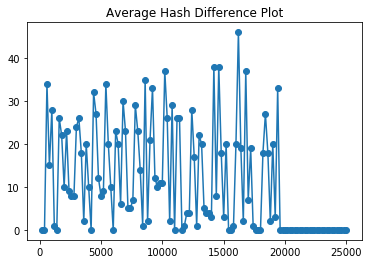

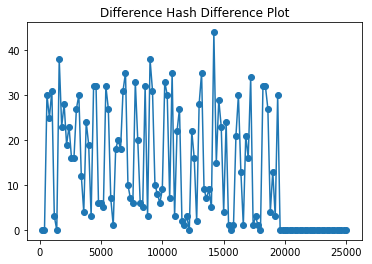

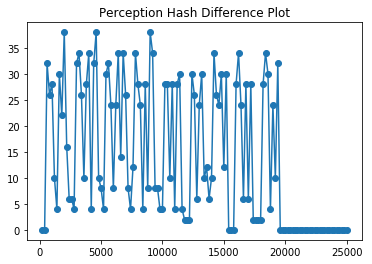

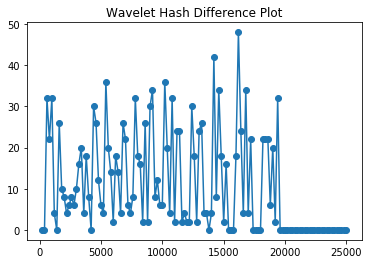

In [40]:
plt.plot(frames[1:], avgStrHashBinDiff, "-o")
plt.title("Average Hash Difference Plot")
plt.show()

plt.plot(frames[1:], dStrHashBinDiff, "-o")
plt.title("Difference Hash Difference Plot")
plt.show()

plt.plot(frames[1:], pStrHashBinDiff, "-o")
plt.title("Perception Hash Difference Plot")
plt.show()

plt.plot(frames[1:], wStrHashBinDiff, "-o")
plt.title("Wavelet Hash Difference Plot")
plt.show()